[[-8.33333838e-02 -2.49983665e-01  4.16651544e-01]
 [ 3.33333364e-01 -1.00776446e-05 -1.66657337e-01]
 [-8.33329791e-02  7.49885223e-01 -5.83227072e-01]]
[[-0.08333333 -0.25        0.41666667]
 [ 0.33333333  0.         -0.16666667]
 [-0.08333333  0.75       -0.58333333]]
A-1*A = 
 [[ 9.99990786e-01  2.22226629e-06  1.87080259e-05]
 [ 5.68458500e-06  9.99998629e-01 -1.15419978e-05]
 [ 6.47434044e-05 -1.56151403e-05  9.99868545e-01]]


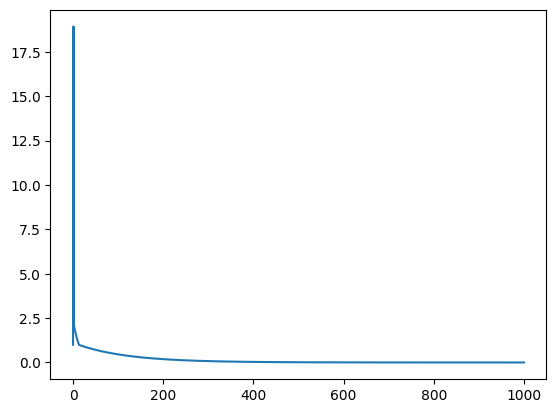

[[-0.08339681 -0.22915011  0.39736316]
 [ 0.3333709  -0.0127083  -0.15490013]
 [-0.08288724  0.60554994 -0.44960117]]
[[-0.08333333 -0.25        0.41666667]
 [ 0.33333333  0.         -0.16666667]
 [-0.08333333  0.75       -0.58333333]]
A-1*A = 
 [[ 0.98823798  0.00283886  0.02387917]
 [ 0.00717045  0.99826676 -0.01455425]
 [ 0.08148093 -0.01965143  0.83456022]]


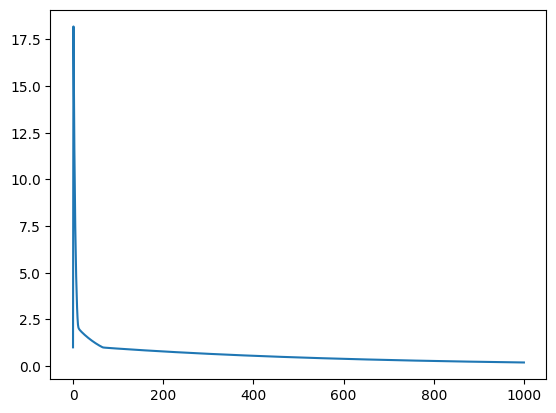

[[-282007.02383738 -374843.27663949 -403943.53549392]
 [-293896.88418894 -390647.55761    -420975.63401776]
 [-284827.12737805 -378590.7522789  -407984.02391104]]
[[-0.08333333 -0.25        0.41666667]
 [ 0.33333333  0.         -0.16666667]
 [-0.08333333  0.75       -0.58333333]]
A-1*A = 
 [[-5143898.66767308 -2685601.71961633 -2214423.92474368]
 [-5360782.24472339 -2798833.92001128 -2307790.82505446]
 [-5195339.28699494 -2712458.0618921  -2236567.43203685]]


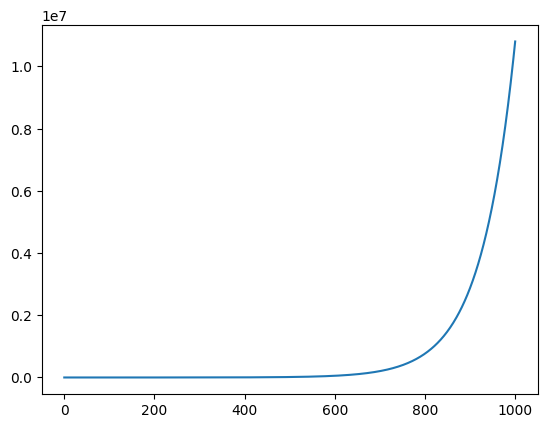

In [1]:
import numpy as np
import matplotlib.pyplot as plt

"""
We look to minimize the equation : Loss = ||BA - I||2_2
The notation above indicates that all the elements of the matrix BA are squared and summed.
i.e. ||X||2_2 = sum(Xij^2)

Here the gradient of the loss function is given by : dL/dB = 2(BA - I)A^T
We are looking to optimize the B matrix using an iterative method, defined by the following equation :
B(k) = B(k-1) - alpha * dL/dB, where alpha is the learning rate.
"""

def matrix_inversion(A: np.array, alpha: float, iterations: int):
   if A.shape[0] != A.shape[1]:
      raise ValueError("Matrix is not square")
   seed_value = 3221
   np.random.seed(seed_value)
   loss=[]
   B_last = np.random.rand(A.shape[0], A.shape[1])
   B = np.zeros(B_last.shape[0])
   for i in range(iterations):
      loss.append(np.linalg.norm(B.dot(A) - np.identity(3), ord=2))
      B = B_last - alpha * 2 * (B.dot(A) - np.identity(3)).dot(A.T)
      B_last = B
   print(B)
   print(np.linalg.inv(A))
   print("A-1*A = \n", B_last.dot(A))
   # Linespace 0 to iterations
   x = np.linspace(0, iterations, iterations)
   # Plot the loss function and keep the plot open after function returns
   plt.figure()
   plt.plot(x, loss)
   plt.show()
   return B
   
   
if __name__ == "__main__":
   # Q1
   A = np.array([[3, 4, 1], 
              [5, 2, 3],
              [6, 2, 2]])
   
   B1 = matrix_inversion(A, 0.005, 1000)
   B2 = matrix_inversion(A, 0.001, 1000)
   B3 = matrix_inversion(A, 0.01, 1000)
   
   # Get the distance between the matrices for indices
   # Create 3 dimension array, (3, 3, 3). first dim is the matrix, second and third are the indices
   b_12 = np.zeros((3, 3))
   for j in range(3):
      for k in range(3):
         b_12[j][k] = abs(B1[j][k] - B2[j][k])
   b_23 = np.zeros((3, 3))
   for j in range(3):
      for k in range(3):
         b_23[j][k] = abs(B2[j][k] - B3[j][k])
   b_13 = np.zeros((3, 3))
   for j in range(3):
      for k in range(3):
         b_13[j][k] = abs(B1[j][k] - B3[j][k])      
   
   # print("Distance between B1 and B2 : \n", b_12)
   # print("Distance between B2 and B3 : \n", b_23)
   # print("Distance between B1 and B3 : \n", b_13)
   # plt.legend()
   # plt.show()